In [1]:
import pandas as pd

In [2]:
ls data

X_test_allDescriptors.csv   test.csv
X_train_allDescriptors.csv  train.csv
power_transformer.pkl       y_train.csv
quantile_transformer.pkl    y_train_power.csv
sample_submission.csv       y_train_quantile.csv


In [3]:
X_train = pd.read_csv("data/X_train_allDescriptors.csv")
X_test = pd.read_csv("data/X_test_allDescriptors.csv")
y_train = pd.read_csv("data/y_train.csv")

In [4]:
optuna_selected_feature_list = pd.read_csv("selected_features.csv")

In [5]:
X_train_filtered = X_train[optuna_selected_feature_list.squeeze().tolist()]
print(X_train_filtered.shape)

(1681, 106)


In [6]:
X_train_filtered = X_train_filtered.loc[:, ~(X_train_filtered == 0).all(axis=0)]
print(X_train_filtered.shape)

(1681, 96)


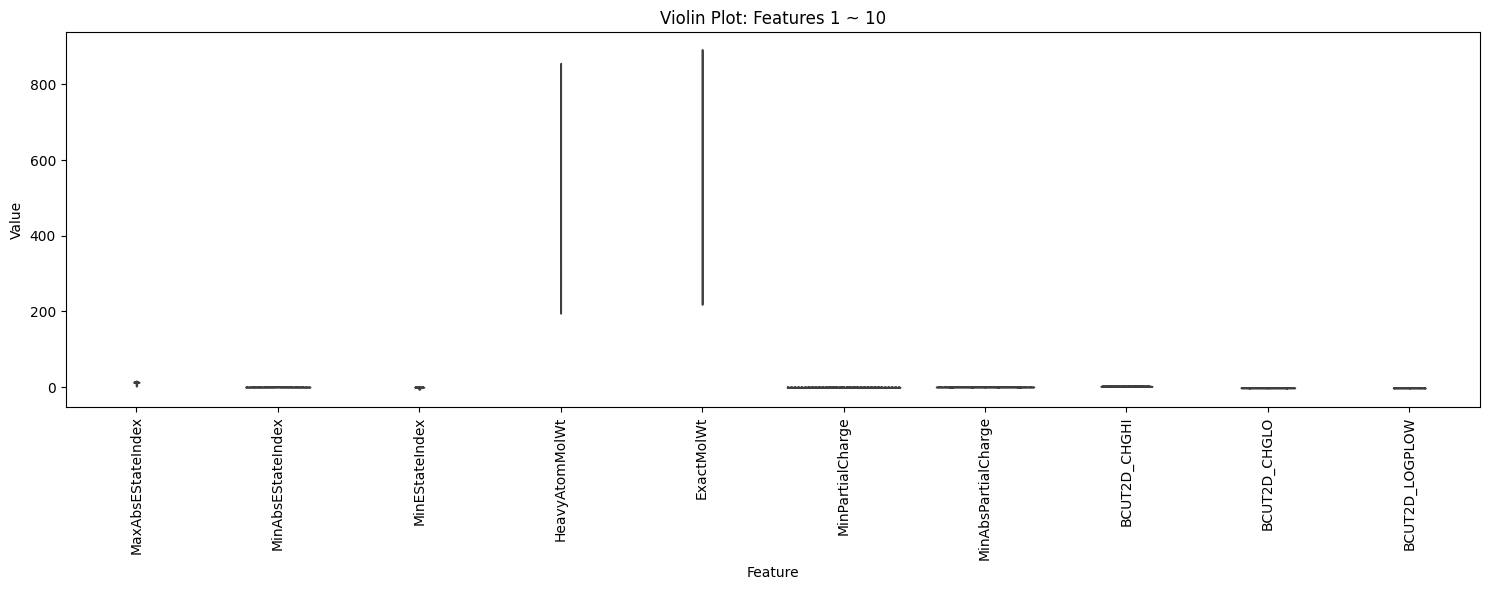

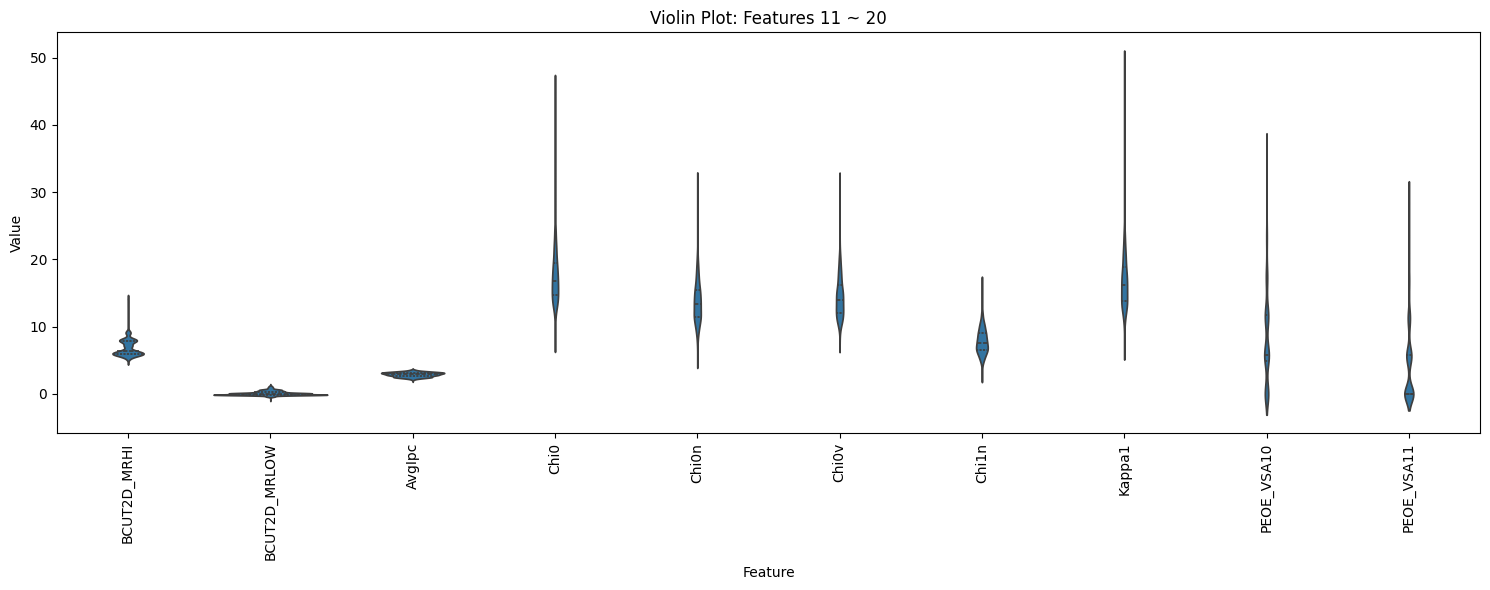

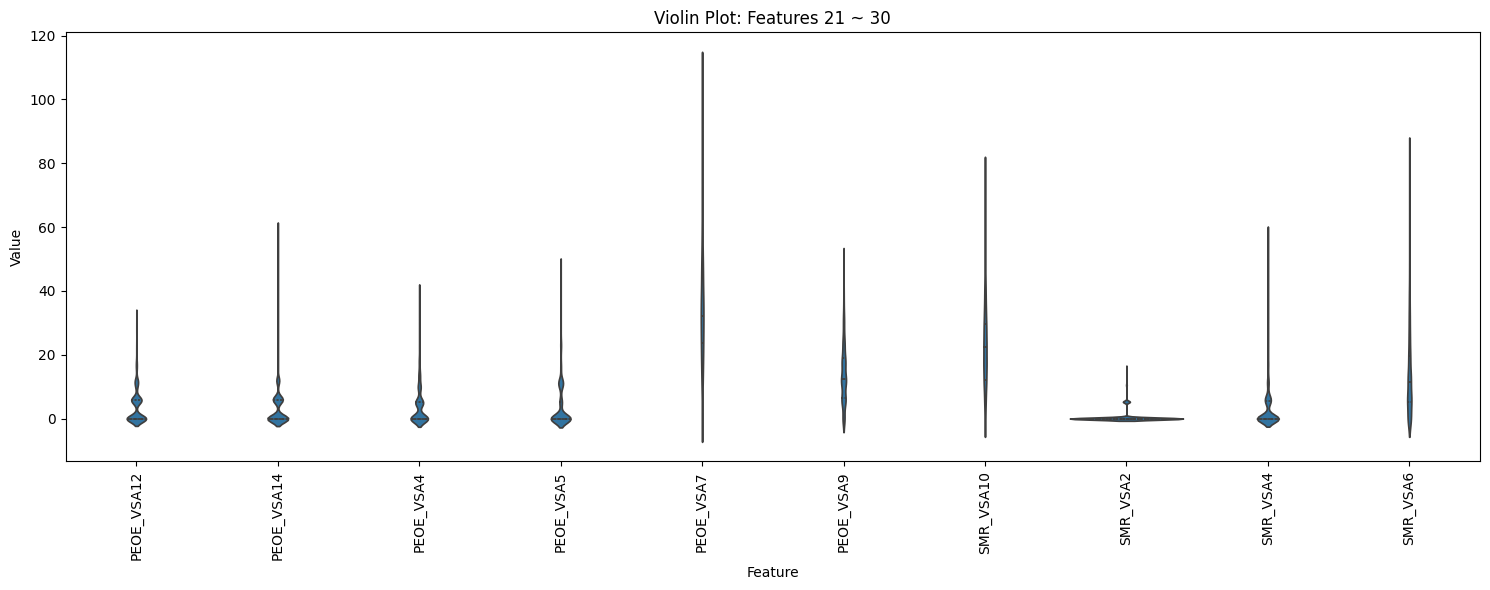

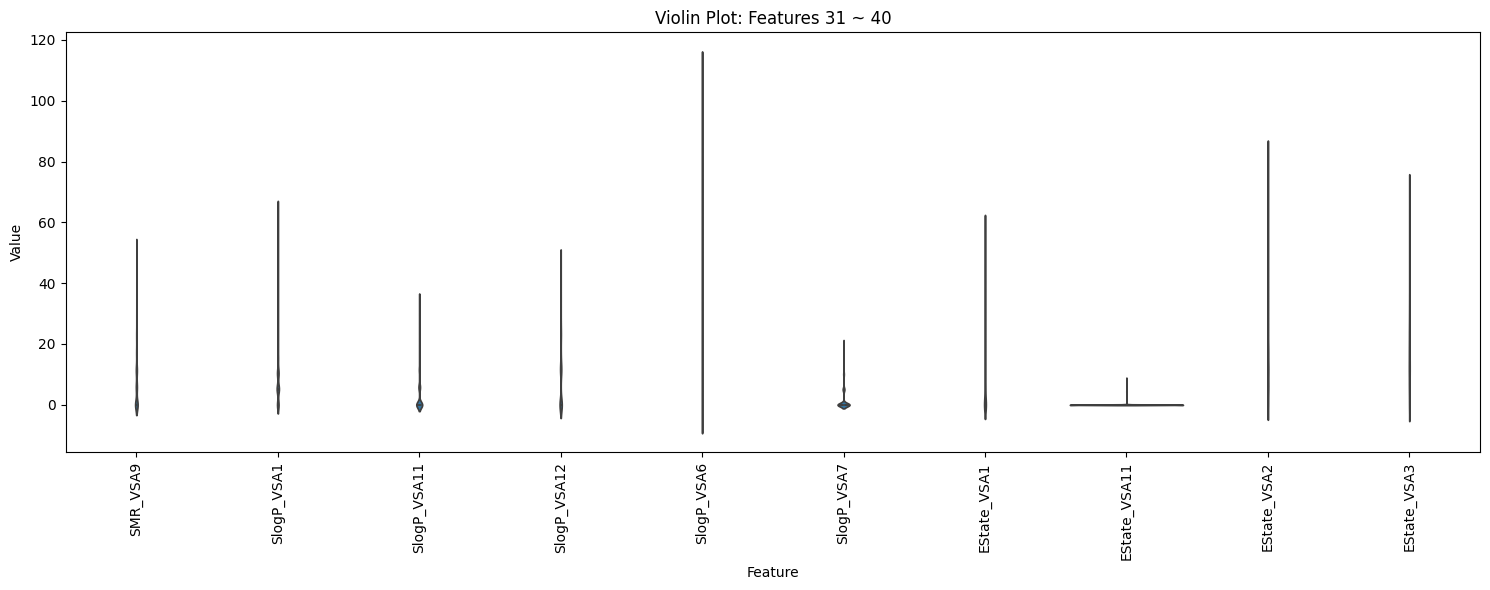

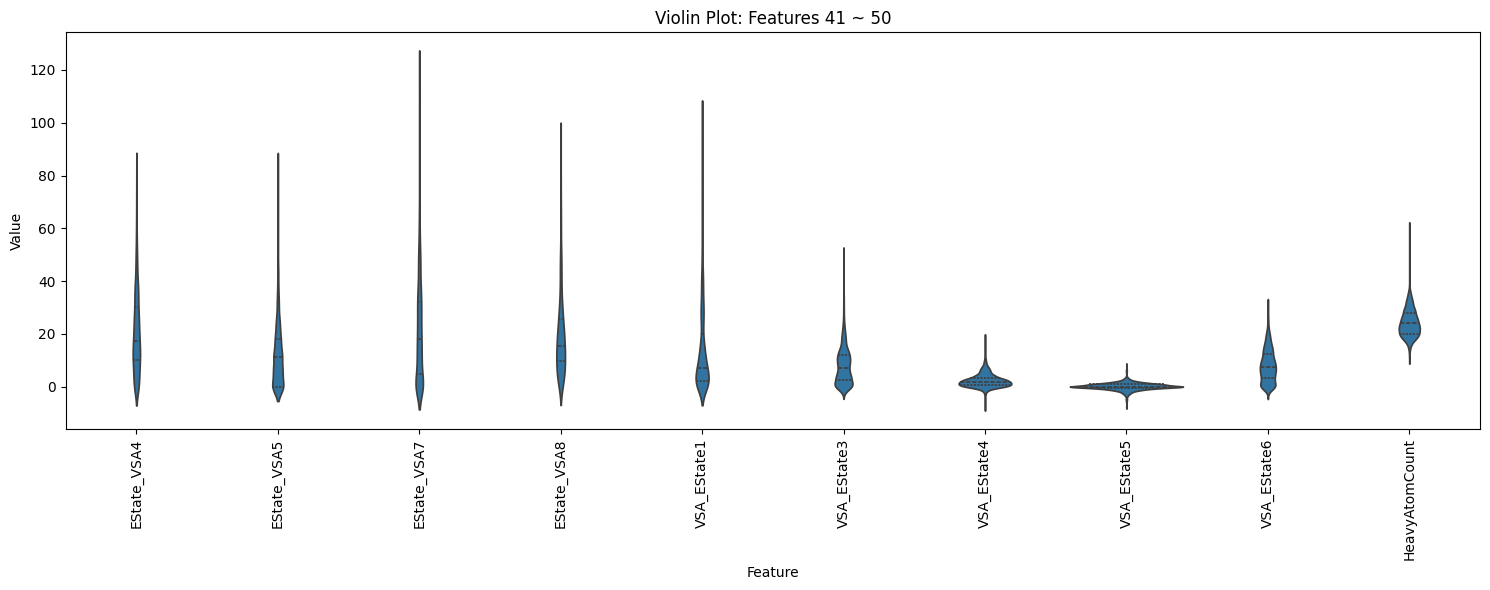

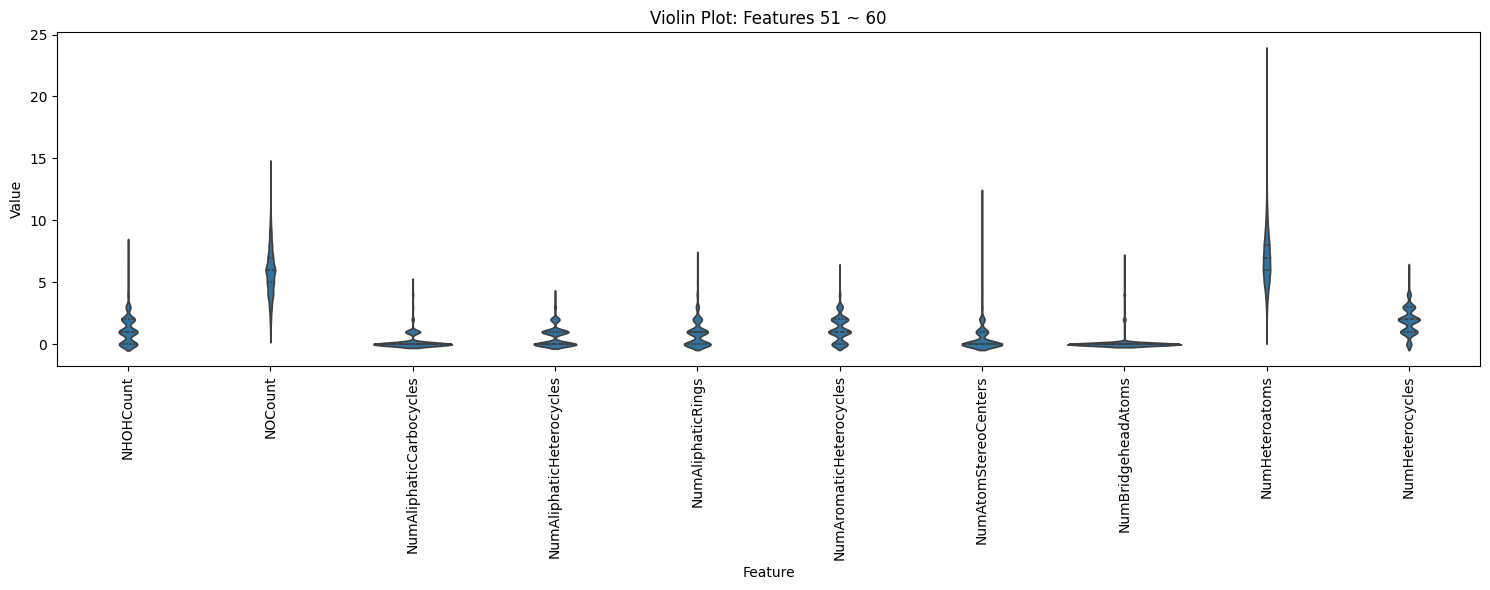

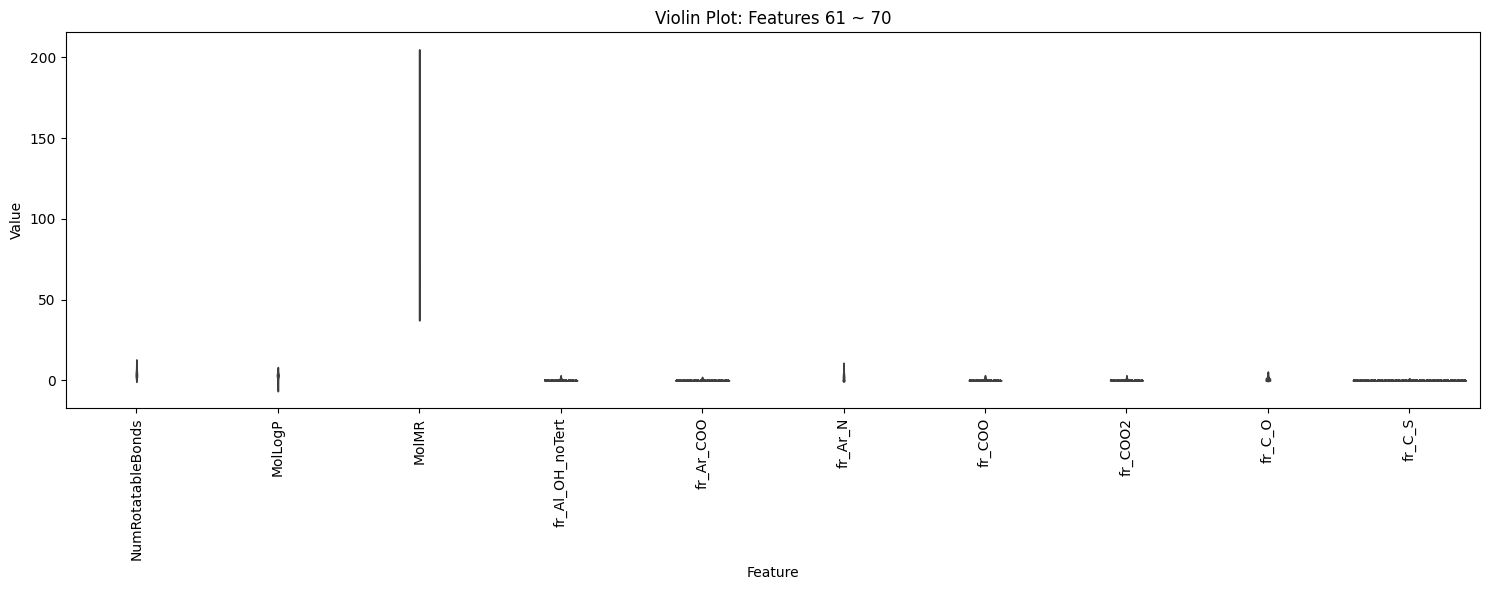

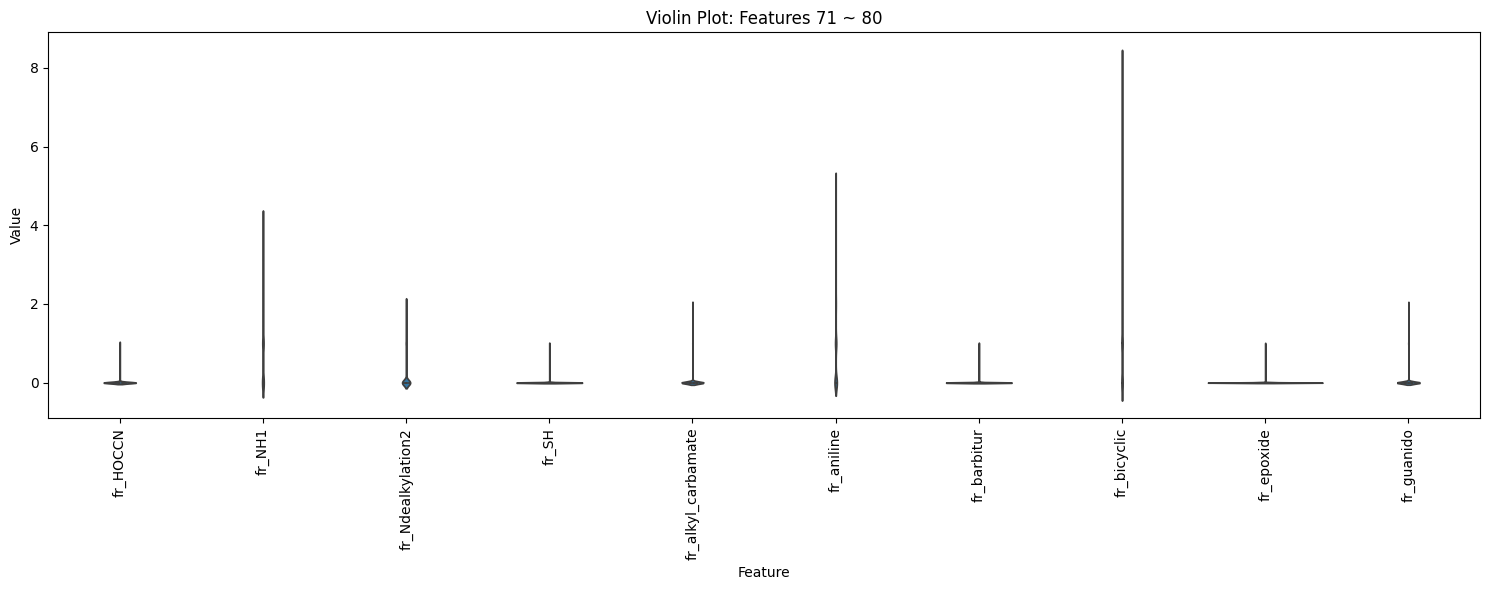

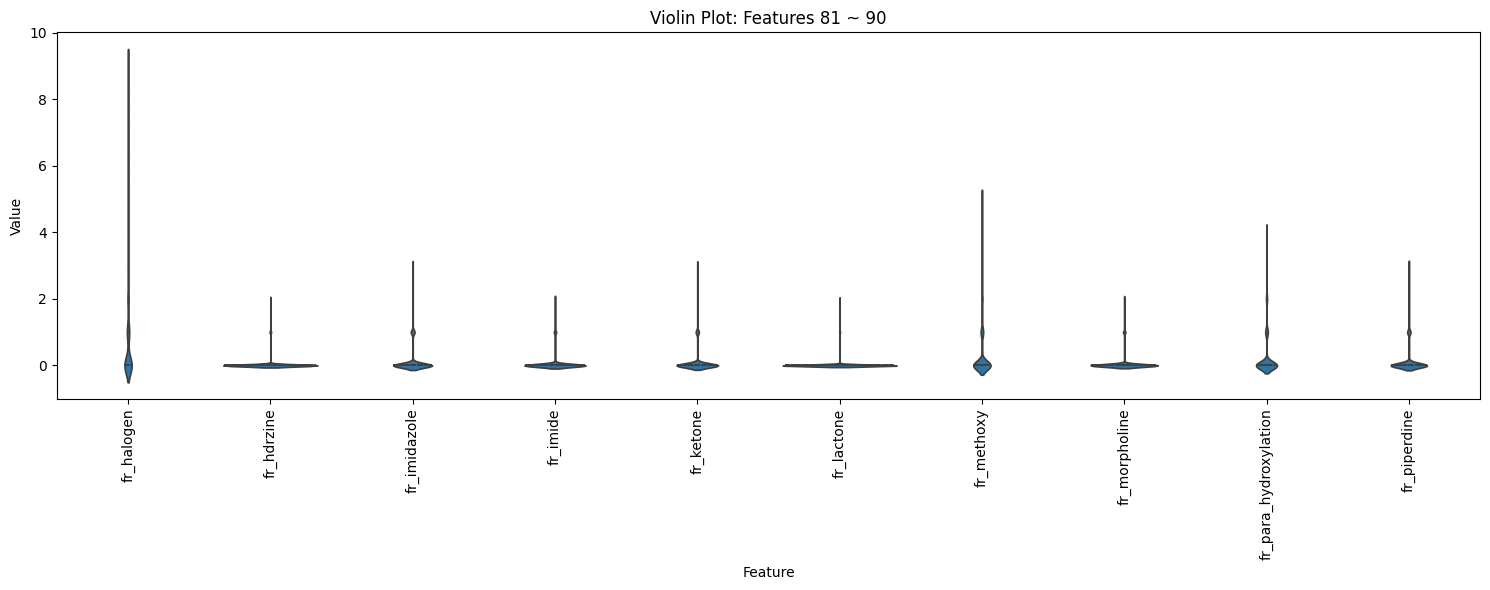

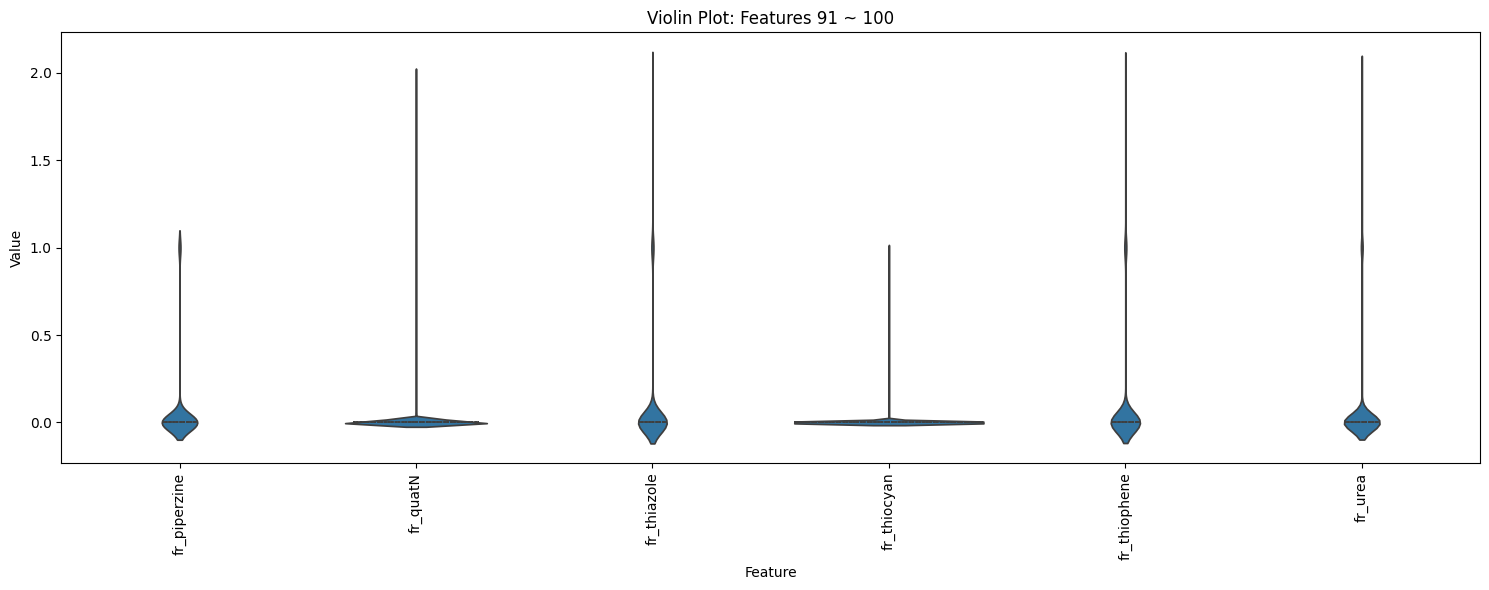

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예시: 106개 feature를 가진 DataFrame
# df = pd.read_csv("your_data.csv")  # 실제 데이터로 대체

# 바이올린 플롯을 그리기 위해 long format으로 변환
df_long = X_train_filtered.melt(var_name='Feature', value_name='Value')

# 피처가 많아서 너무 복잡하니, 그래프를 나눠서 그리기 (예: 4x4 subplot)
num_features = X_train_filtered.shape[1]
features_per_plot = 10  # 한 그래프에 몇 개씩 보여줄지
num_plots = (num_features + features_per_plot - 1) // features_per_plot

for i in range(num_plots):
    subset_features = X_train_filtered.columns[i * features_per_plot:(i + 1) * features_per_plot]
    df_subset = X_train_filtered[subset_features].melt(var_name='Feature', value_name='Value')

    plt.figure(figsize=(15, 6))
    sns.violinplot(x='Feature', y='Value', data=df_subset, inner='quartile')
    plt.xticks(rotation=90)
    plt.title(f"Violin Plot: Features {i * features_per_plot + 1} ~ {(i + 1) * features_per_plot}")
    plt.tight_layout()
    plt.show()

In [8]:
y_train

,Inhibition
0,12.500000
1,4.450000
2,4.920000
3,71.500000
4,18.300000
...,...
1676,0.500000
1677,0.500000
1678,0.500000
1679,0.500000


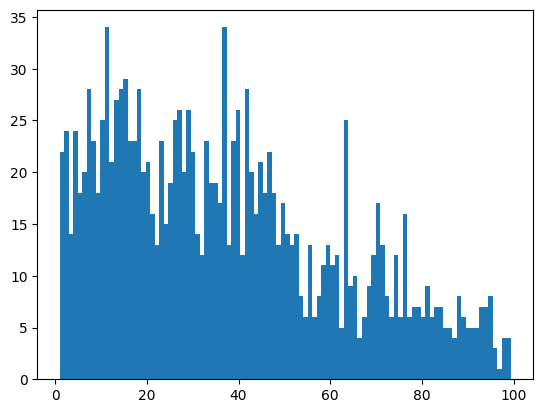

In [9]:
import numpy as np
plt.hist(y_train[y_train["Inhibition"] > 1], bins=100)
plt.show()

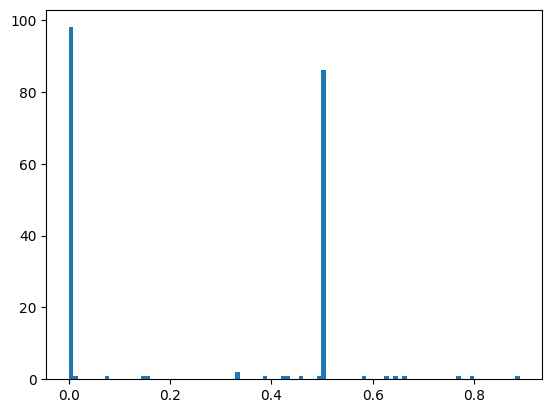

In [10]:
plt.hist(y_train[y_train["Inhibition"] <= 1], bins=100)
plt.show()

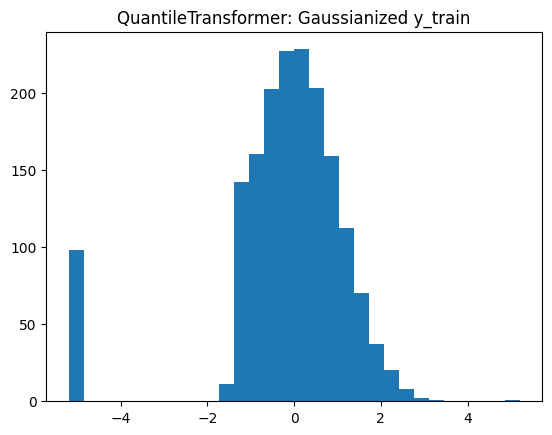

In [11]:
from sklearn.preprocessing import QuantileTransformer
y_transformed_quantile = pd.DataFrame()
qt = QuantileTransformer(output_distribution='normal')  # 또는 'uniform'
y_transformed_quantile["Inhibition"] = qt.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# 확인
plt.hist(y_transformed_quantile, bins=30)
plt.title("QuantileTransformer: Gaussianized y_train")
plt.show()


import joblib

# 저장
joblib.dump(qt, 'data/quantile_transformer.pkl')
pd.DataFrame(y_transformed_quantile).to_csv("data/y_train_quantile.csv", index=False)

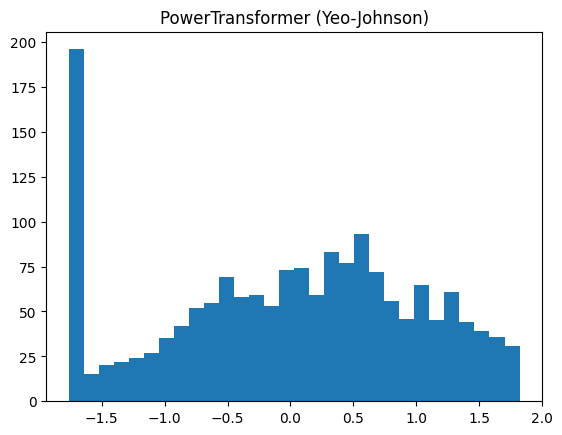

In [12]:
from sklearn.preprocessing import PowerTransformer
y_transformed_power = pd.DataFrame()

pt = PowerTransformer(method='yeo-johnson')  # y에 음수 있어도 됨!
y_transformed_power["Inhibition"] = pt.fit_transform(y_train.values.reshape(-1, 1)).ravel()

plt.hist(y_transformed_power, bins=30)
plt.title("PowerTransformer (Yeo-Johnson)")
plt.show()

# 저장
joblib.dump(pt, 'data/power_transformer.pkl')
pd.DataFrame(y_transformed_power).to_csv("data/y_train_power.csv", index=False)